<a href="https://colab.research.google.com/github/DaveChui/Week-1-IP_ML_04_2022/blob/main/Machine_Learning_Week_1_IP_Dave_Njoroge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1. Problem Statement
           1. Define the question, the metric for success, the context, experimental design taken and the appropriateness of the available data to answer the given question
           2. Expected flow for the assessment:
                • Perform your EDA
                • Perform any necessary feature engineering 
                • Check of multicollinearity
                • Start building the model
                • Cross-validate the model
                • Compute RMSE
                • Create residual plots for your models, and assess their heteroscedasticity using Bartlett’s test
            3. Perform appropriate regressions on the data including your justification
            4. Challenge your solution by providing insights on how you can make improvements.

##2. Reading the Data

In [3]:
# Loading the Dataset and necessary libraries
# 
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import pandas.util.testing as tm
from sklearn import linear_model, datasets
from sklearn.model_selection import GridSearchCV

ranking = pd.read_csv('fifa_ranking.csv')
results = pd.read_csv('results.csv')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import sys


In [4]:
#preview our data
ranking.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [5]:
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [6]:
# Renaming rank_date column to date on the fifa ranking dataset for merging purposes
#
 
ranking.rename(columns = {'rank_date': 'date'}, inplace = True)

In [7]:
#preview the data for new changes
ranking.head(2)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08


In [8]:
# We merge the two datasets to get one with the features we're interested in.
#

dataset = pd.merge(ranking, results, on='date', how='inner')

##3. Checking the data

In [9]:
# Checkingthe no. of records in our dataset


dataset.shape

(212831, 24)

In [10]:
# Previewing the top and bottom of our dataset respetively
#

dataset.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,...,confederation,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,...,UEFA,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False
1,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,...,UEFA,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False
2,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,...,UEFA,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False
3,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,...,UEFA,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False
4,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,...,UEFA,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False


In [11]:
dataset.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,...,confederation,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
212826,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,...,OFC,2018-06-07,Abkhazia,United Koreans in Japan,2,0,CONIFA World Football Cup,Bromley,England,True
212827,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,...,OFC,2018-06-07,Barawa,Panjab,0,5,CONIFA World Football Cup,Sutton,England,False
212828,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,...,OFC,2018-06-07,Cascadia,Western Armenia,4,0,CONIFA World Football Cup,Bromley,England,True
212829,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,...,OFC,2018-06-07,Northern Cyprus,Padania,3,2,CONIFA World Football Cup,Carshalton,England,True
212830,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,...,OFC,2018-06-07,Kárpátalja,Székely Land,4,2,CONIFA World Football Cup,Carshalton,England,True


In [12]:
# Checking the fields' datatypes
#

dataset.dtypes

rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
date                        object
home_team                   object
away_team                   object
home_score                   int64
away_score                   int64
tournament                  object
city                        object
country                     object
neutral                       bool
dtype: object

In [13]:
#Learning a few things about our data
dataset.describe()

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,home_score,away_score
count,212831.000000,212831.000000,212831.000000,212831.000000,212831.000000,212831.000000,212831.000000,212831.000000,212831.000000,212831.000000,212831.000000,212831.000000,212831.000000,212831.000000
mean,101.865569,42.595921,341.226241,-0.009233,21.501386,21.501386,21.121801,10.560920,20.978279,6.293489,21.200981,4.240217,1.682109,1.047033
std,58.645033,163.908824,295.081640,4.537736,85.367571,85.367571,89.736563,44.868317,84.562404,25.368726,86.314387,17.262906,1.970033,1.257858
min,1.000000,0.000000,0.000000,-62.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,0.000000,71.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,102.000000,0.000000,297.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,152.000000,0.000000,531.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000
max,209.000000,1770.060000,1920.000000,71.000000,1126.040000,1126.040000,1169.570000,584.790000,1159.710000,347.910000,1200.770000,240.150000,31.000000,12.000000


##4. Cleaning the data

In [14]:
#chacking our fields
dataset.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'date', 'home_team',
       'away_team', 'home_score', 'away_score', 'tournament', 'city',
       'country', 'neutral'],
      dtype='object')

In [15]:
#checking for duplicates in our dataset
dataset.duplicated().sum()

33

In [16]:
#Dropping the duplicate columns in our dataset
dataset.drop_duplicates(keep=False, inplace=True)

In [17]:
#checking for duplicates to ensure they have been dropped
dataset.duplicated().sum()

0

In [18]:
#checking for null values
dataset.isnull().sum()

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
date                       0
home_team                  0
away_team                  0
home_score                 0
away_score                 0
tournament                 0
city                       0
country                    0
neutral                    0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

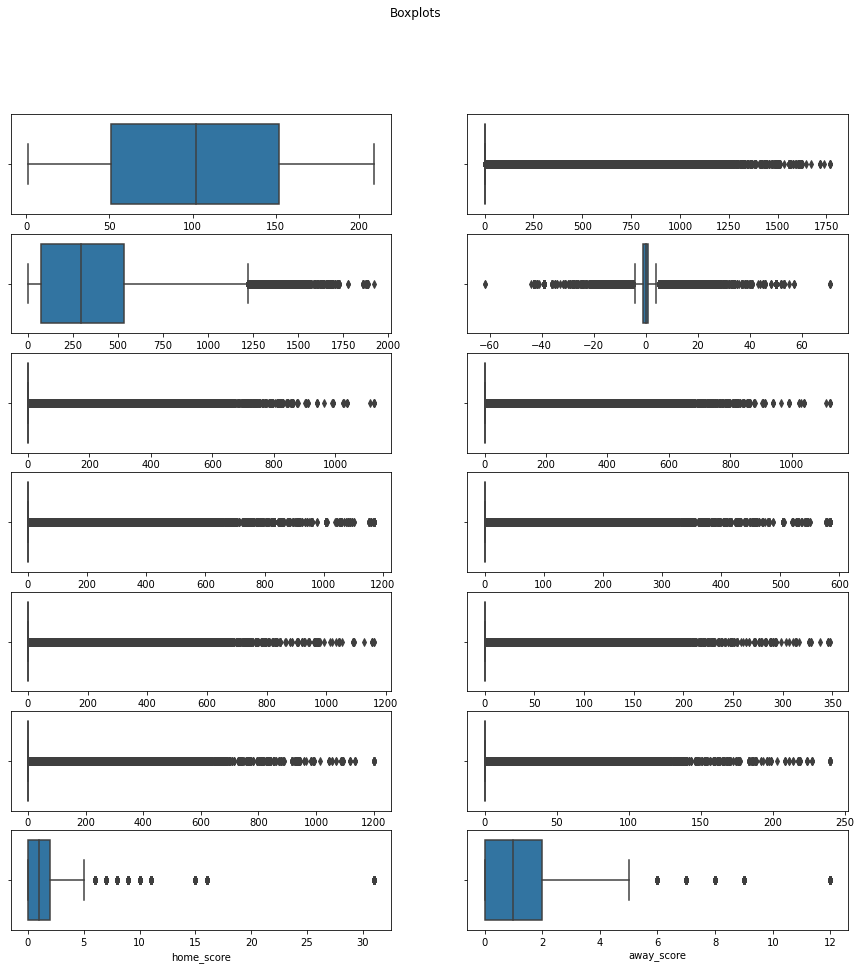

In [19]:
# Checking for Outliers
#
import seaborn as sns

fig, ((ax1, ax2), (ax3, ax4),(ax5, ax6), (ax7, ax8), (ax9, ax10), (ax11, ax12), (ax13, ax14)) = plt.subplots(7,2, figsize=(15, 15))
fig.suptitle('Boxplots')

sns.boxplot(dataset['rank'], ax=ax1)
sns.boxplot(dataset['total_points'], ax=ax2)
sns.boxplot(dataset['previous_points'], ax=ax3)
sns.boxplot(dataset['rank_change'], ax=ax4)
sns.boxplot(dataset['cur_year_avg'], ax=ax5)
sns.boxplot(dataset['cur_year_avg_weighted'], ax=ax6)
sns.boxplot(dataset['last_year_avg'], ax=ax7)
sns.boxplot(dataset['last_year_avg_weighted'], ax=ax8)
sns.boxplot(dataset['two_year_ago_avg'], ax=ax9)
sns.boxplot(dataset['two_year_ago_weighted'], ax=ax10)
sns.boxplot(dataset['three_year_ago_avg'], ax=ax11)
sns.boxplot(dataset['three_year_ago_weighted'], ax=ax12)
sns.boxplot(dataset['home_score'], ax=ax13)
sns.boxplot(dataset['away_score'], ax=ax14)
plt.show()

In [20]:
# Retrieving the outliers from our dataset using a z-test
#
numeric = dataset[['rank','total_points','previous_points','rank_change','cur_year_avg','cur_year_avg_weighted','last_year_avg',
                    'last_year_avg','last_year_avg_weighted','two_year_ago_avg','two_year_ago_weighted',
                    'three_year_ago_avg','three_year_ago_weighted','home_score','away_score']]

from scipy import stats
z = np.abs(stats.zscore(numeric))
print(z)

[[1.71963455 0.25945533 0.96312997 ... 0.2451744  0.669083   0.03727591]
 [1.71963455 0.25945533 0.96312997 ... 0.2451744  0.34628361 0.03727591]
 [1.71963455 0.25945533 0.96312997 ... 0.2451744  1.6844496  0.83260383]
 ...
 [1.77547259 0.25945533 1.15626896 ... 0.2451744  1.1767663  0.83260383]
 [1.77547259 0.25945533 1.15626896 ... 0.2451744  0.669083   0.758052  ]
 [1.77547259 0.25945533 1.15626896 ... 0.2451744  1.1767663  0.758052  ]]


In [21]:
# Dropping and checking if the outliers have been dropped from our dataset.
#
new_df= numeric[(z < 3).all(axis=1)]
print(f"Previous dataframe size : {numeric.shape[0]}")
print(f"New dataframe size: {new_df.shape[0]}")

Previous dataframe size : 212765
New dataframe size: 190748


##5. Exploratory Data Analysis

In [22]:
# previewing our data to evaluate necessity of columns
dataset.head(3)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,...,confederation,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,...,UEFA,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False
1,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,...,UEFA,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False
2,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,...,UEFA,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False


In [23]:
# Dropping unnecessary columns
dataset = dataset.drop(['country_abrv','date','country_full','country','confederation','city','neutral'], axis = 1)
dataset.head(3)

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,home_team,away_team,home_score,away_score,tournament
0,1,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bolivia,Uruguay,3,1,FIFA World Cup qualification
1,1,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Brazil,Mexico,1,1,Friendly
2,1,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Ecuador,Venezuela,5,0,FIFA World Cup qualification


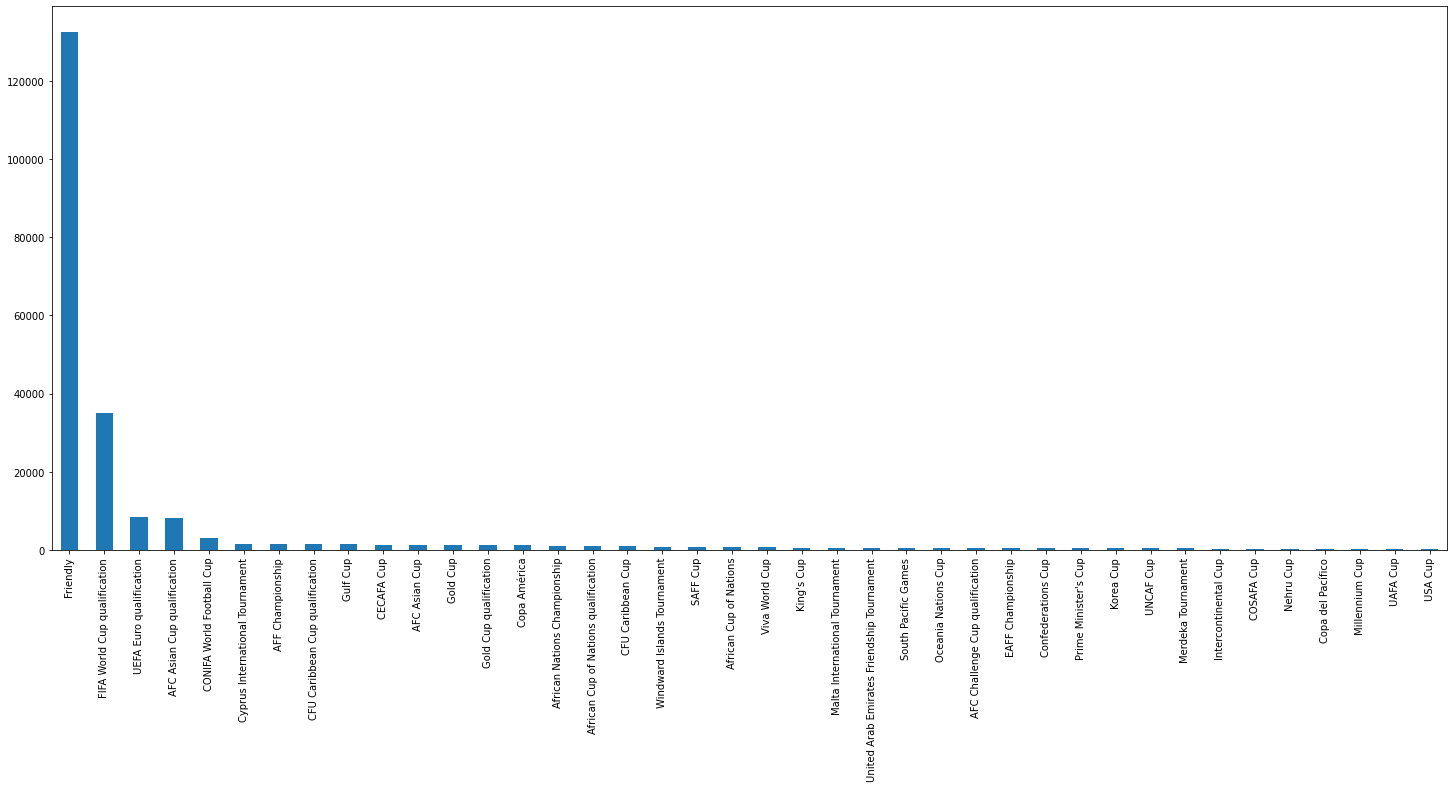

In [24]:
# Ploting the univariate summaries and making our observations
#
plt.figure(figsize=(25,10))
dataset['tournament'].value_counts().plot.bar()

#####From the above diagram we can observe tha the USA cup is the least played tournament as well as Friendly Matches being the most played. The reason could be that Friendly matches are easier to organize as one or both teams are only required to travel(to the away team) from time to time as opposed to joining a league e.t.c

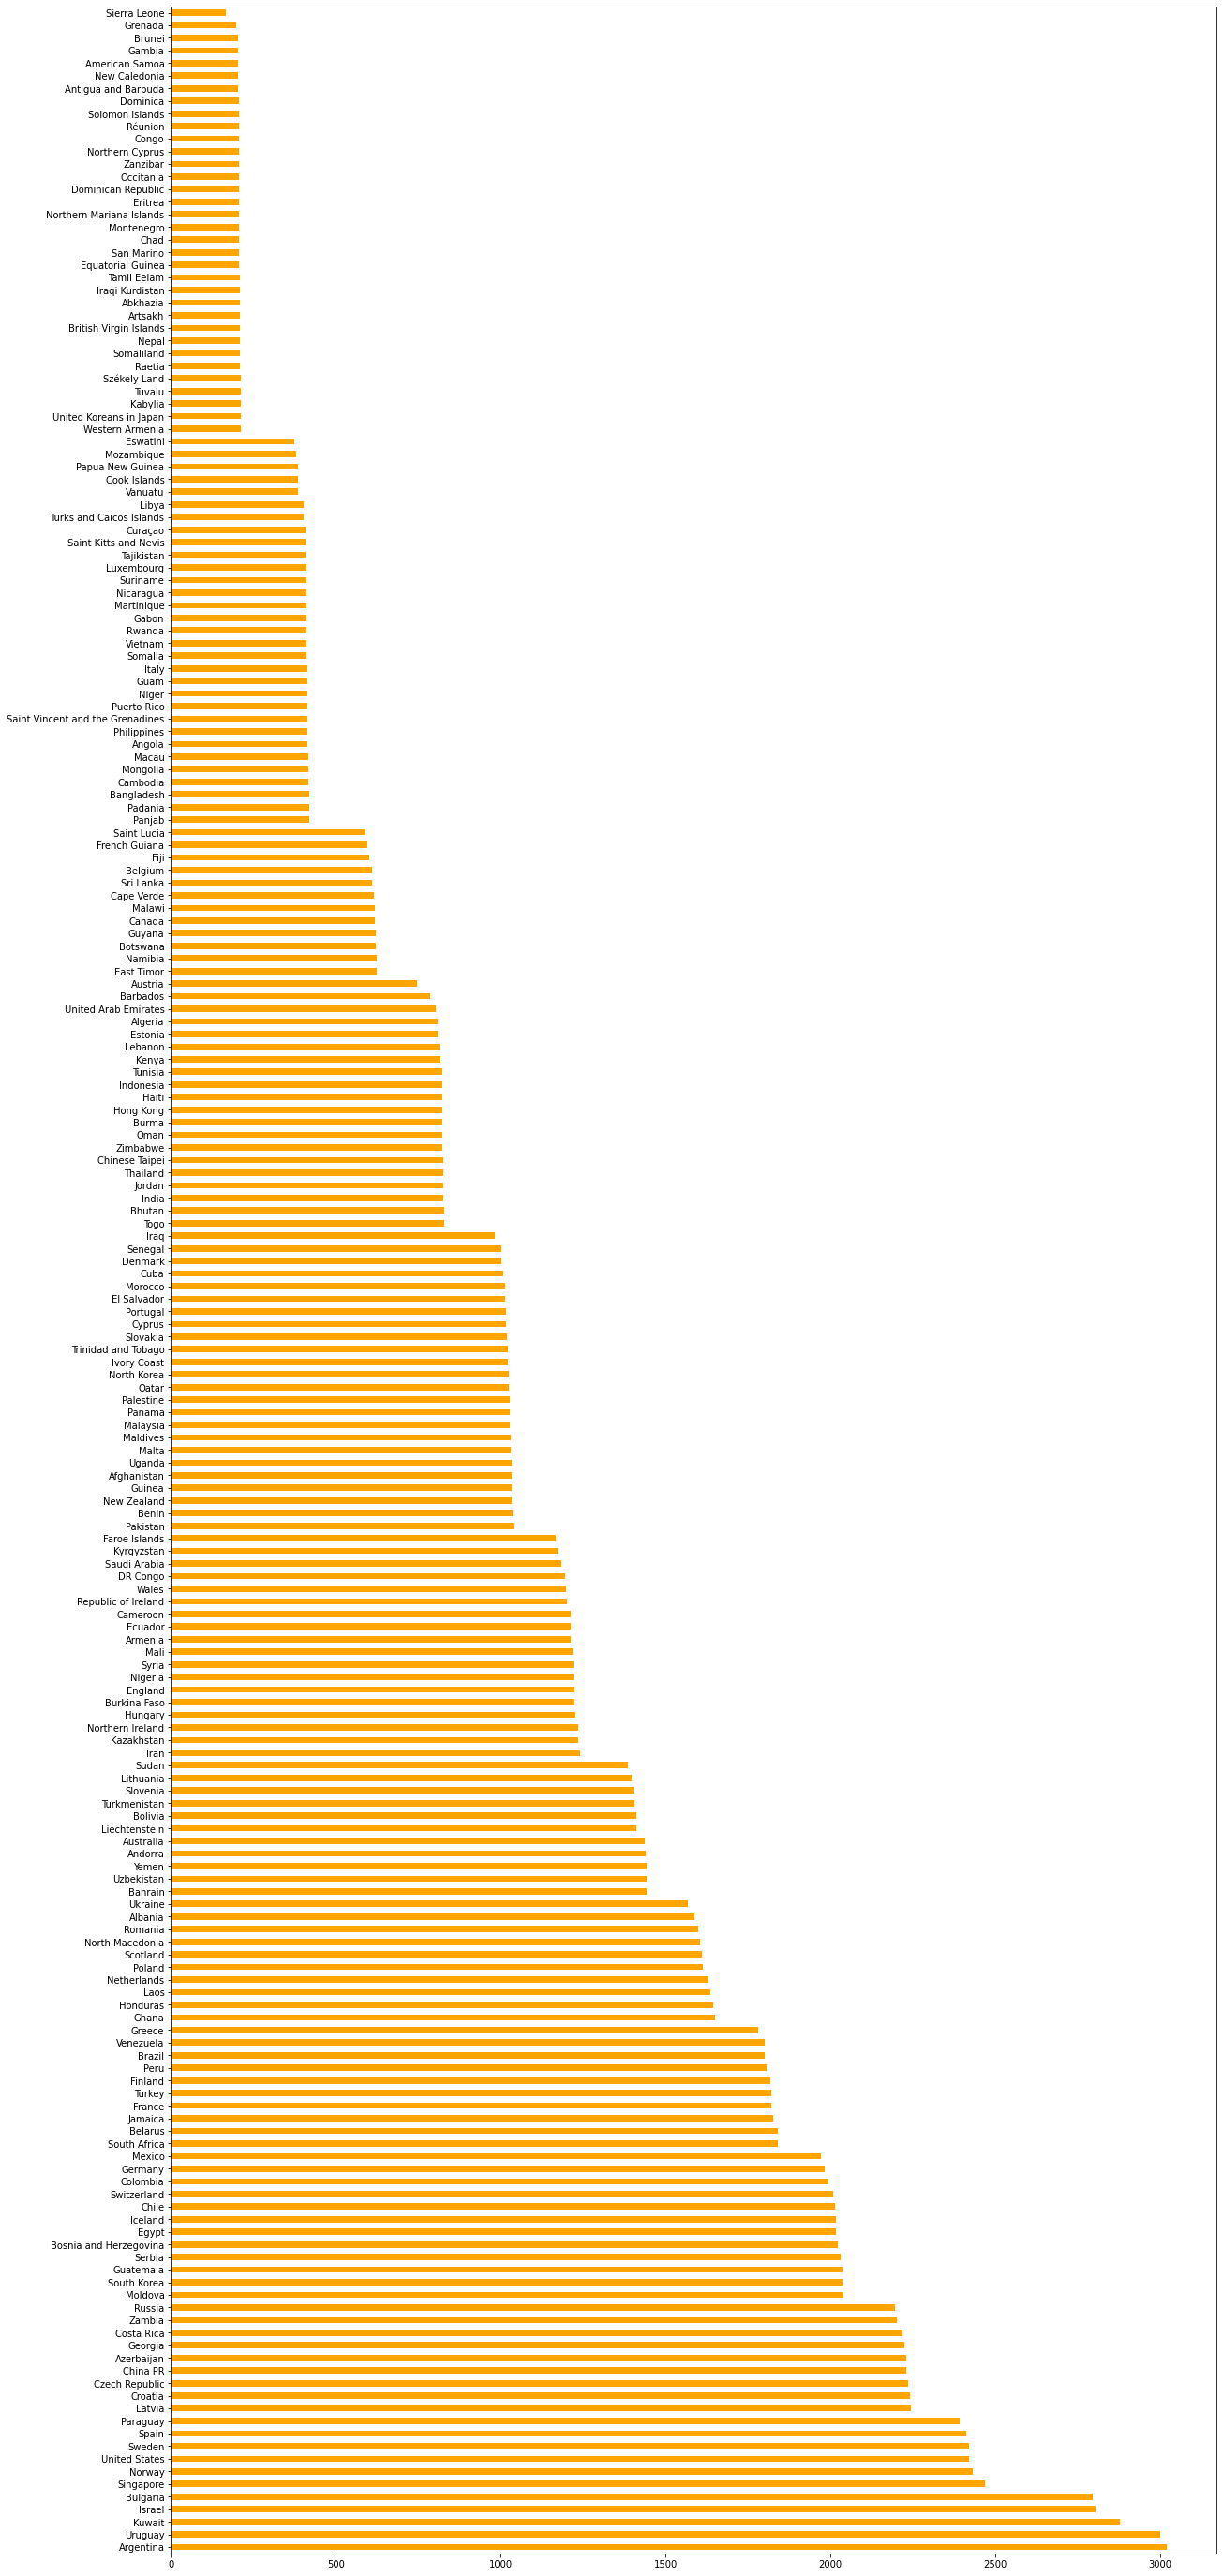

In [25]:
# Plotting the away_team chart to show the number of hosted games
#
plt.figure(figsize=(20,50))
dataset['away_team'].value_counts().plot.barh(color = 'orange')

######From the above diagram, we can see that Argentina has the highest number of Away matches.

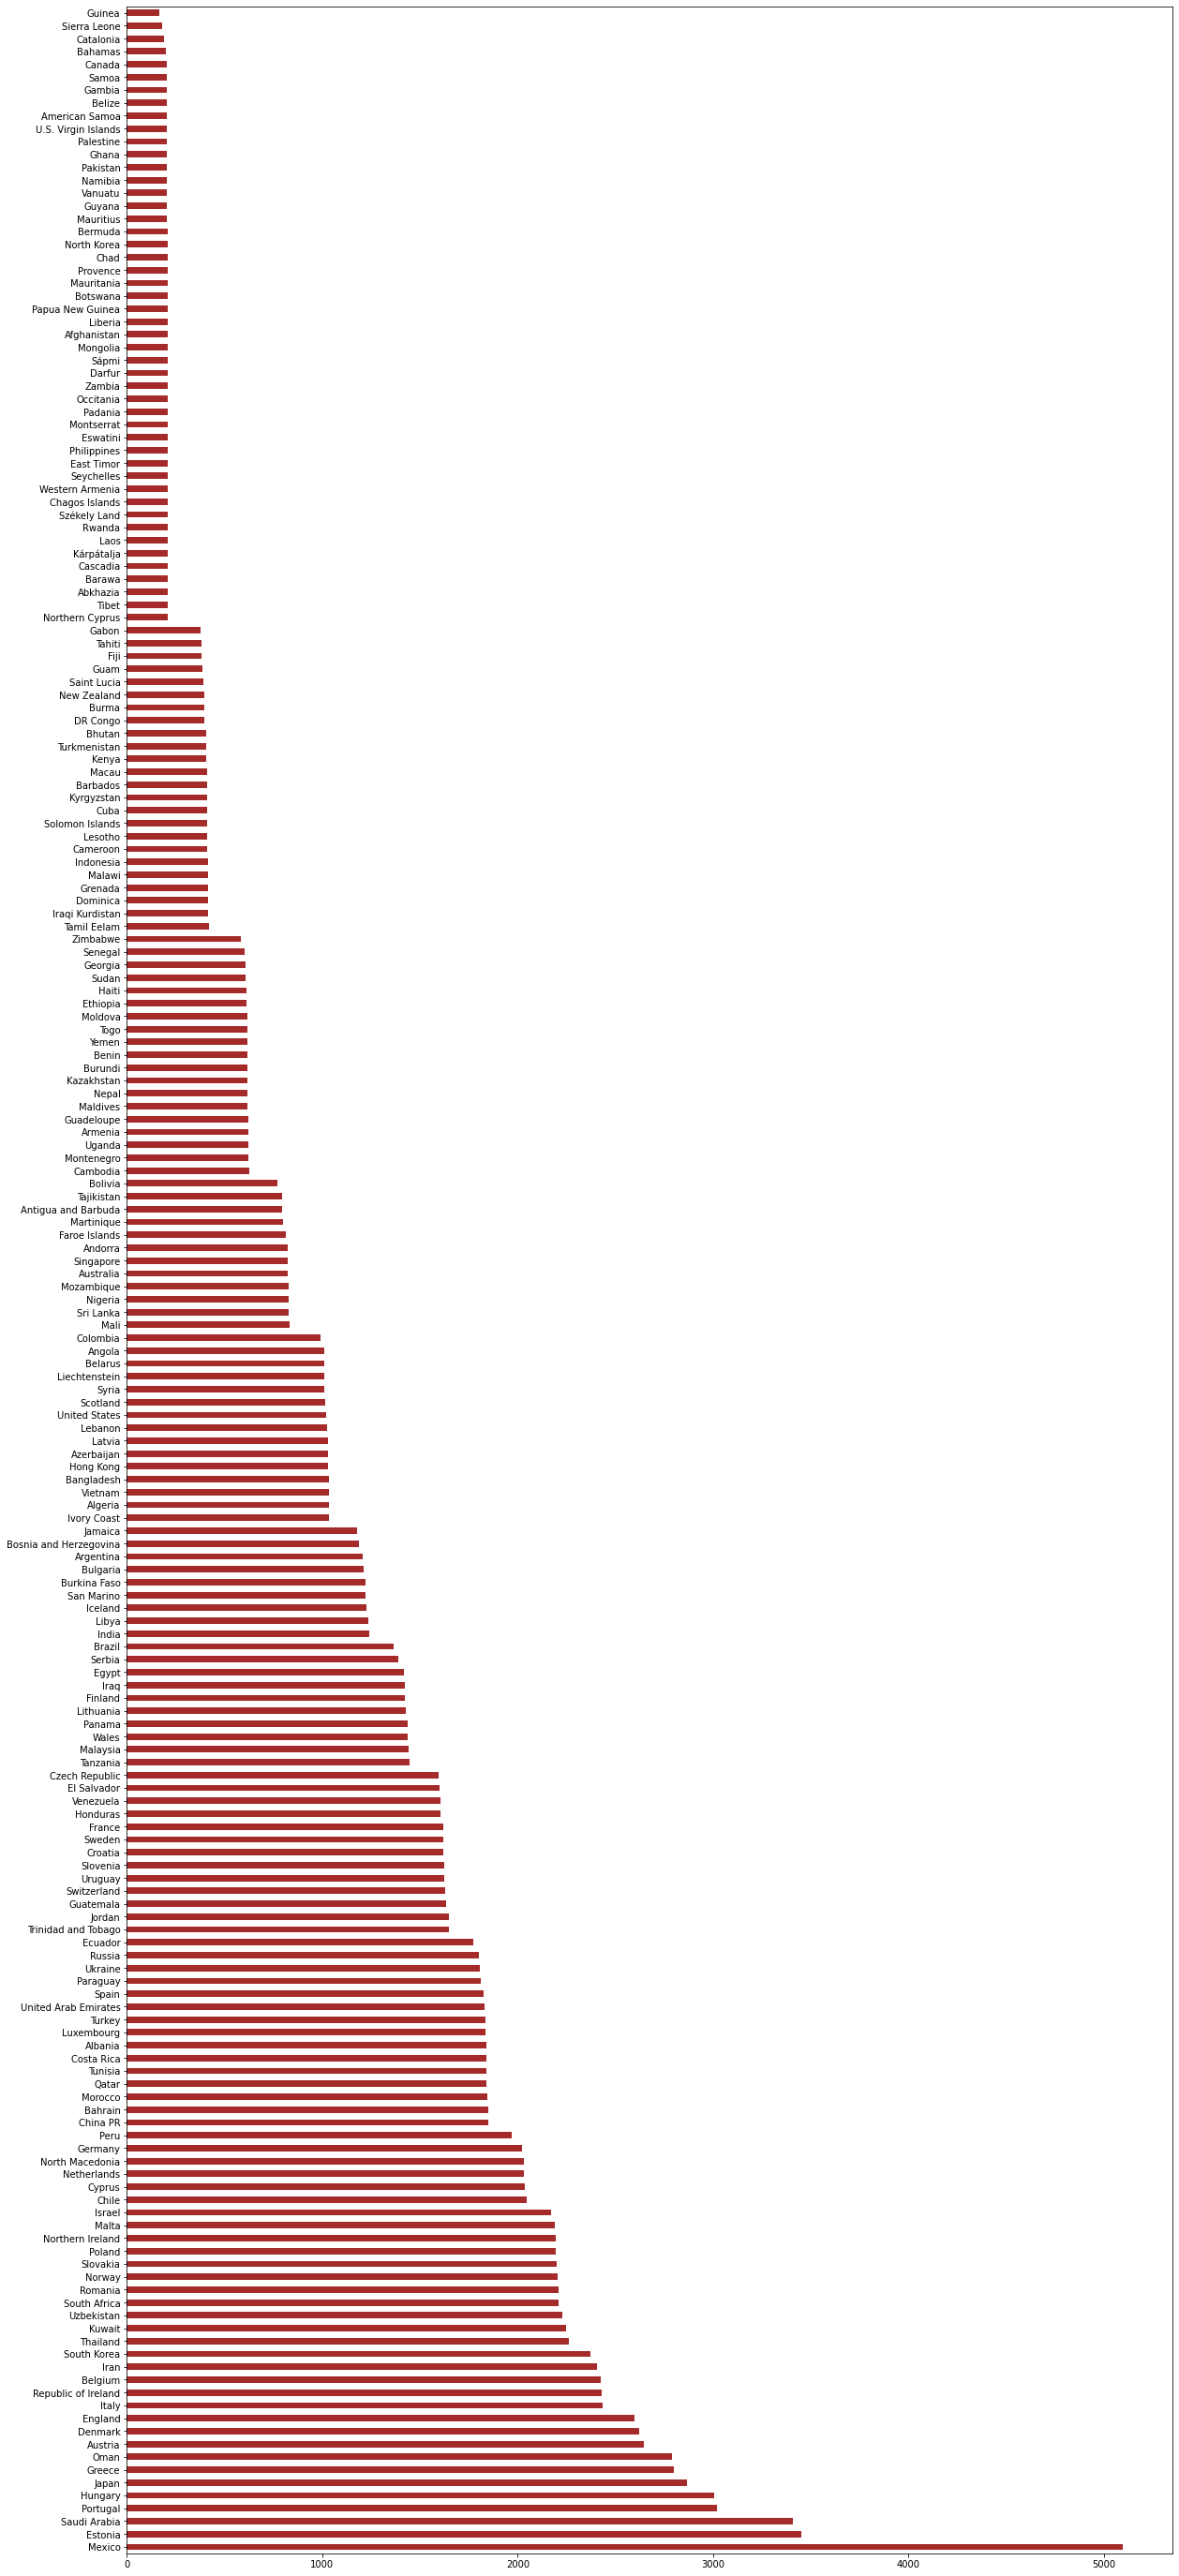

In [26]:
# Plotting the home_team chart to show the number of hosted games
#
plt.figure(figsize=(20,50))
dataset['home_team'].value_counts().plot.barh(color = 'brown')

#####It's clear from the above chart that Mexico has hosted the most games with the opposite being true for Guinea.

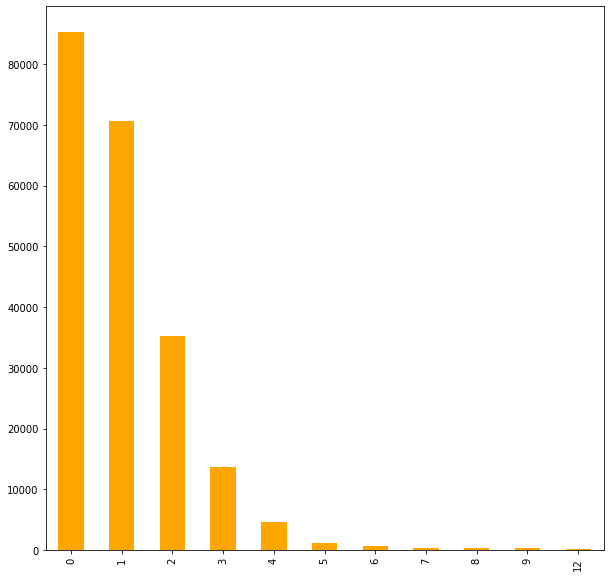

In [27]:
#Let's plot a chart to show the number of away goals scored

plt.figure(figsize=(10,10))
dataset['away_score'].value_counts().plot.bar(color = 'orange')


####From the above figure we can see the distribution of  Away goals scored. With Nil being the highest and 12 being the least.

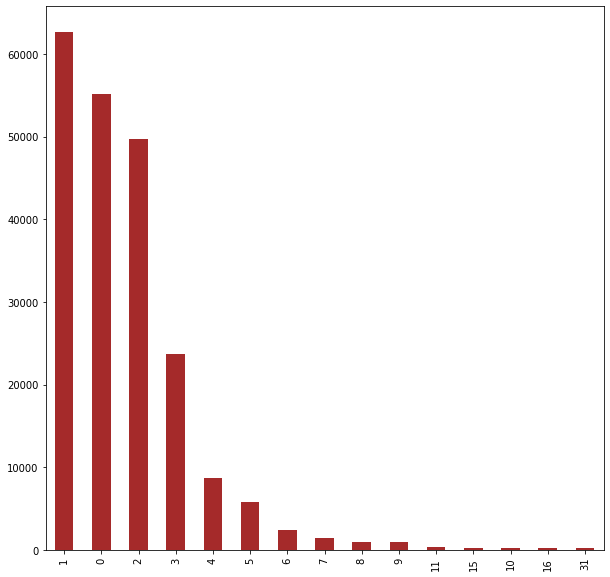

In [28]:
#Let's plot a chart to show the number of home goals scored

plt.figure(figsize=(10,10))
dataset['home_score'].value_counts().plot.bar(color = 'brown')


####We can observe from the above graph that the most number of home goals scored is one(1)

##5. Polynomial Regression

In [29]:
# Importing required libraries for polynomial regression

from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

# Import LinearRegression method from sklearn linear_model library
from sklearn.linear_model import LinearRegression

In [30]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
dataset["home_team_code"] = lb_make.fit_transform(dataset["home_team"])
dataset[["home_team", "home_team_code"]].head(5)

,home_team,home_team_code
0,Bolivia,24
1,Brazil,27
2,Ecuador,52
3,Guinea,73
4,Paraguay,138


In [31]:
lb_make = LabelEncoder()
dataset["away_team_code"] = lb_make.fit_transform(dataset["away_team"])
dataset[["away_team", "away_team_code"]].head()

,away_team,away_team_code
0,Uruguay,191
1,Mexico,110
2,Venezuela,194
3,Sierra Leone,159
4,Argentina,8


In [32]:
lb_make = LabelEncoder()
dataset["tournament_code"] = lb_make.fit_transform(dataset["tournament"])
dataset[["tournament", "tournament_code"]].head(2)

,tournament,tournament_code
0,FIFA World Cup qualification,17
1,Friendly,18


##We start with the Home Team

In [33]:
dataset.head(3)

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,home_team,away_team,home_score,away_score,tournament,home_team_code,away_team_code,tournament_code
0,1,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bolivia,Uruguay,3,1,FIFA World Cup qualification,24,191,17
1,1,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Brazil,Mexico,1,1,Friendly,27,110,18
2,1,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Ecuador,Venezuela,5,0,FIFA World Cup qualification,52,194,17


In [34]:
# Split the data into features and labels
X = dataset.drop(["home_score","home_team","away_team","tournament","previous_points", 'total_points', 
                    'rank_change','cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted', 
                   'two_year_ago_avg', 'two_year_ago_weighted','three_year_ago_avg', 'three_year_ago_weighted'],axis=1)
y = dataset['home_score']

In [35]:
# Split into Training and Test( 20% for testing and 80% for training)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [36]:
# Fit the Independent Variables to a Polynomial equation with a degree of 3
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 3)
Xtrain_poly = poly_reg.fit_transform(X_train)
Xtest_poly = poly_reg.fit_transform(X_test)

In [37]:
pol_reg = LinearRegression()
pol_reg.fit(Xtrain_poly, y_train)

LinearRegression()

In [38]:
# We get the predictions as an array
poly_predic = pol_reg.predict(poly_reg.fit_transform(X_test))
print(poly_predic )

[1.26368272 2.46444794 1.50642835 ... 1.32839343 0.72027164 3.99669956]


In [39]:
from sklearn import metrics

poly_predic = pol_reg.predict(poly_reg.fit_transform(X_test))

# Our first metric is MAE - Mean absolute error
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, poly_predic))

# We can also use MSE - Mean squared error
print('Mean Squared Error:', metrics.mean_squared_error(y_test, poly_predic))  

# Finally, the most popular metric: RMSE - Root mean squared error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, poly_predic))) 

Mean Absolute Error: 1.2305221388181322
Mean Squared Error: 3.5282970528182687
Root Mean Squared Error: 1.878376174470457


###Now the away Team

In [40]:
# We are going to plot the relationship between away team scores and other fields
# Split the data into features and labels
X = dataset.drop(["away_score","home_team","away_team","tournament","previous_points", 'total_points', 
                    'rank_change','cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted', 
                   'two_year_ago_avg', 'two_year_ago_weighted','three_year_ago_avg', 'three_year_ago_weighted'],axis=1)
y = dataset['away_score']

In [41]:
# Split into Training and Test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [42]:
# Fit the Independet Variables to a Polynomial
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 3)
Xtrain_poly = poly_reg.fit_transform(X_train)
Xtest_poly = poly_reg.fit_transform(X_test)

In [43]:
pol_reg = LinearRegression()
pol_reg.fit(Xtrain_poly, y_train)

LinearRegression()

In [44]:
# We get the predictions as an array
poly_pred = pol_reg.predict(poly_reg.fit_transform(X_test))
print(poly_pred )

[1.02427922 0.70403729 1.11747343 ... 0.8681021  0.62084926 0.84072396]


In [45]:
from sklearn import metrics

poly_pred = pol_reg.predict(poly_reg.fit_transform(X_test))

# Our first metric is MAE - Mean absolute error
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, poly_pred))

# We can also use MSE - Mean squared error
print('Mean Squared Error:', metrics.mean_squared_error(y_test, poly_pred))  

# Finally, the most popular metric: RMSE - Root mean squared error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, poly_pred))) 

Mean Absolute Error: 0.863899429283922
Mean Squared Error: 1.4621507411578172
Root Mean Squared Error: 1.2091942528633757


###Here we get an RMSE of 1.21 which suggests a sufficient model for our prediction.

##Logistic Regression

#####Home Team

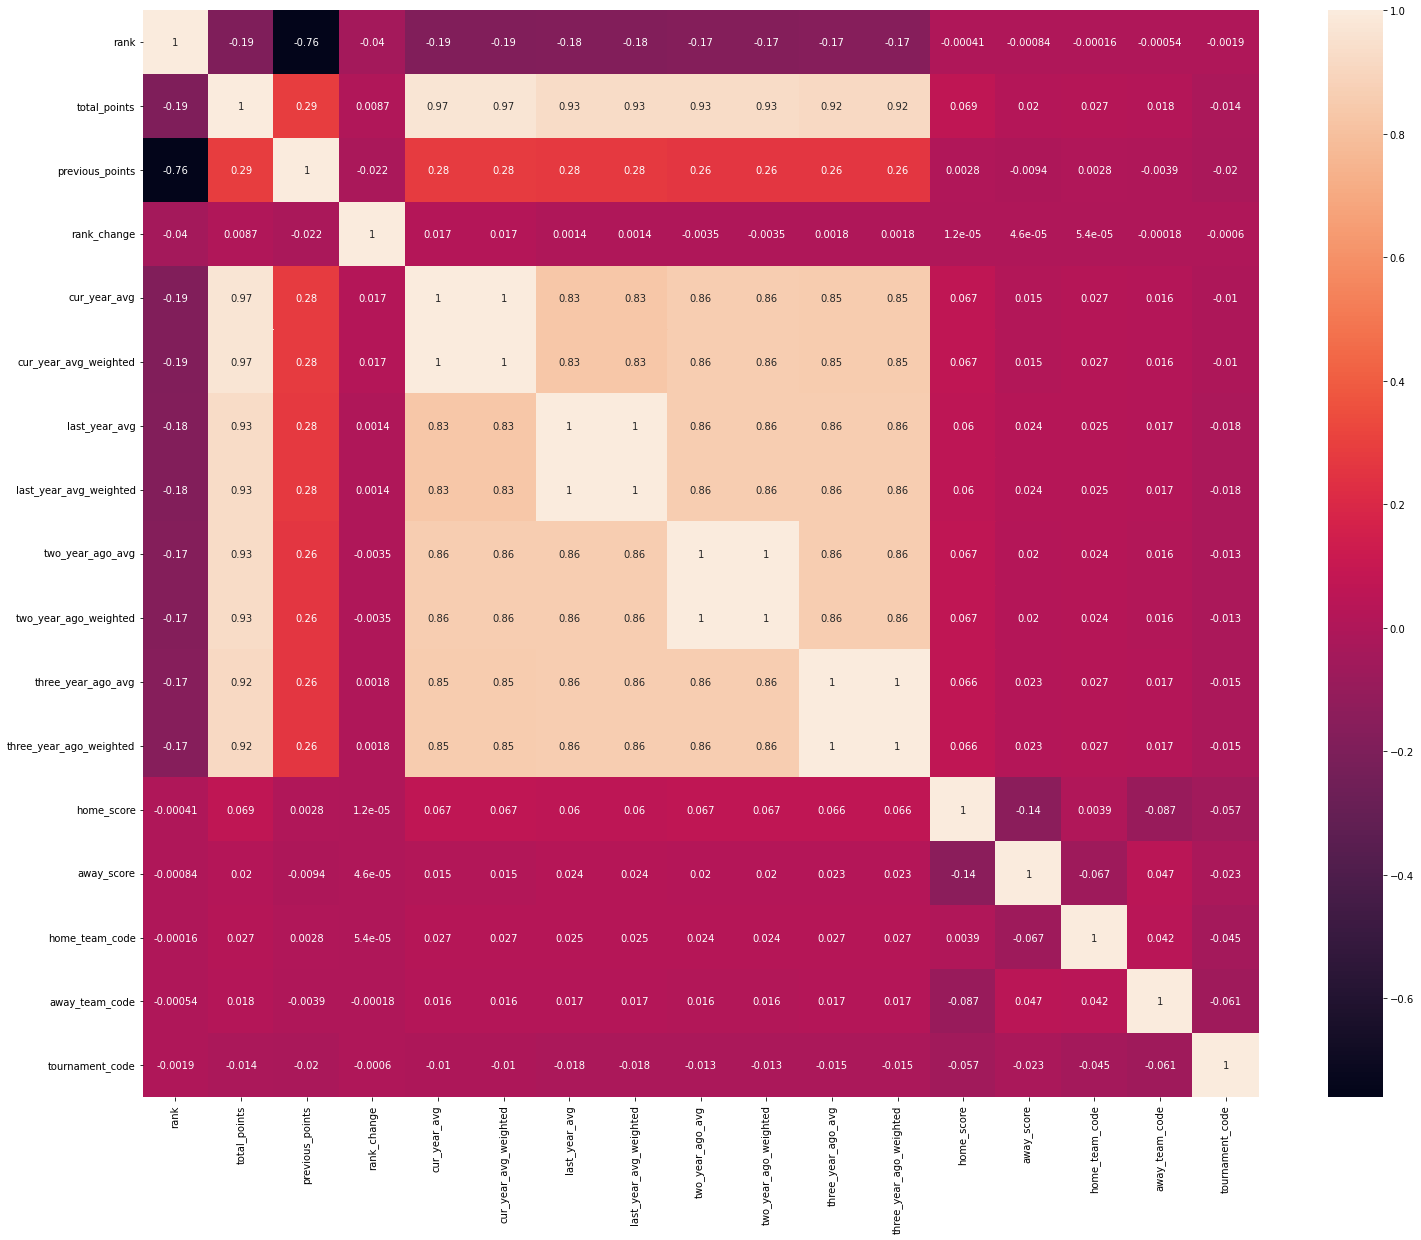

In [46]:
# Plotting a heatmap to check the inter-dependence of the variables.

plt.figure(figsize=(25,20))

sns.heatmap(dataset.corr(),annot=True)

In [47]:
#From the above, the inter-dependence isn't much and we'll proceed to drop the columns we do not need as below.

# Splitting our dataset
#
X = dataset.drop(["home_score","home_team","away_team","tournament","previous_points", 'total_points', 
                    'rank_change','cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted', 
                   'two_year_ago_avg', 'two_year_ago_weighted','three_year_ago_avg', 'three_year_ago_weighted'],axis=1)
y = dataset["home_score"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

####From the above piece of code, we drop the columns we do not require and split the data into training and testing sets.

In [48]:
X.head()

,rank,away_score,home_team_code,away_team_code,tournament_code
0,1,1,24,191,17
1,1,1,27,110,18
2,1,0,52,194,17
3,1,0,73,159,18
4,1,3,138,8,17


In [49]:
# Fitting our model
# 
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [50]:
# Using our model to make a prediction
#
y_pred = LogReg.predict(X_test)

In [51]:
# Evaluating the model
#
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[ 2205, 14017,   312,     0,     0,     0,     0,     0,     0,
            0,     0,     7,     0,     0,     0],
       [ 2293, 16284,   219,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0],
       [ 1287, 13206,   302,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0],
       [  834,  6172,   106,     0,     0,     8,     0,     0,     0,
            0,     0,     0,     0,     0,     0],
       [  125,  2356,    95,     0,     0,    29,     0,     0,     0,
            0,     0,     0,     0,     0,     0],
       [   82,  1559,   114,     0,     0,    15,     0,     0,     0,
            0,     0,     0,     0,     0,     0],
       [   99,   633,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0],
       [    0,   455,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0],
       [    0,   324,   

In [52]:
from sklearn import metrics

y_pred = LogReg.predict(X_test)

# Our first metric is MAE - Mean absolute error
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

# We can also use MSE - Mean squared error
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  

# Finally, the most popular metric: RMSE - Root mean squared error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

Mean Absolute Error: 1.244963183456055
Mean Squared Error: 4.561867460441799
Root Mean Squared Error: 2.135852864886015


In [53]:
# Use score method to get accuracy of model
score = LogReg.score(X_test, y_test)
print(score)

# Accuracy is at 29%

0.29462635124549585


###We can see from above execution that our model has a 29% accuracy which is quite low.

#####Away Team

In [54]:
# our dependent variable will be the away score
# Splitting our dataset
#
x = dataset.drop(['away_score',"home_team","away_team","tournament","previous_points", 'total_points', 
                    'rank_change','cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted', 
                   'two_year_ago_avg', 'two_year_ago_weighted','three_year_ago_avg', 'three_year_ago_weighted'],axis=1)
Y = dataset["away_score"]

from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size = .3, random_state=25)

In [55]:
# Fitting our model
# 
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg.fit(x_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [56]:
# Using our model to make a prediction
#
Y_pred = LogReg.predict(x_test)

In [57]:
# Evaluating the model
#
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, Y_pred)
confusion_matrix

array([[18635,  6818,     0,     0,     0,     0,     0,     0,     0,
            0,     0],
       [14742,  6473,     0,     0,     0,     0,     0,     0,     0,
            0,     0],
       [ 6830,  3781,     0,     0,     0,     0,     0,     0,     0,
            0,     0],
       [ 2707,  1479,     0,     0,     0,     0,     0,     0,     0,
            0,     0],
       [  852,   515,     0,     0,     0,     0,     0,     0,     0,
            0,     0],
       [  186,   173,     0,     0,     0,     0,     0,     0,     0,
            0,     0],
       [  139,    64,     0,     0,     0,     0,     0,     0,     0,
            0,     0],
       [   55,    55,     0,     0,     0,     0,     0,     0,     0,
            0,     0],
       [   67,    64,     0,     0,     0,     0,     0,     0,     0,
            0,     0],
       [    0,   128,     0,     0,     0,     0,     0,     0,     0,
            0,     0],
       [   57,    10,     0,     0,     0,     0,     0,    

In [58]:
from sklearn import metrics

y_pred = LogReg.predict(X_test)

# Our first metric is MAE - Mean absolute error
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))

# We can also use MSE - Mean squared error
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))  

#The most popular metric is: RMSE - Root mean squared error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred))) 

Mean Absolute Error: 0.9607707974306753
Mean Squared Error: 2.270687764374119
Root Mean Squared Error: 1.5068801426703182


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- away_score
Feature names seen at fit time, yet now missing:
- home_score

  warnings.warn(message, FutureWarning)


In [59]:
# Use score method to get accuracy of model
score = LogReg.score(x_test, Y_test)
print(score)

0.39335735547548173


####Our regression model has a 39% accuracy rate which is quite low.

###Hyperparameter Tuning
######Gridsearch Cross Validation

In [ ]:
# Feature scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Fitting Kernel SVM to the training set
from sklearn.svm import SVC

classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

In [ ]:
# predicting the test set results

y_predicted = classifier.predict(X_test)

In [ ]:
# making the confusion matrix

from sklearn.metrics import confusion_matrix

con_mat = confusion_matrix(y_test, y_predicted)

In [ ]:
# to check for the accuracy of our score

from sklearn.metrics import accuracy_score

accuracy  = accuracy_score(y_test, y_predicted)

accuracy

# The accuracy is at 30% without using the appropiate hyperparameters

In [ ]:
#pplying the GridSearchCV to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV

parameters = [{'C' : [1,5,20,100,1000], 'kernel' : ['linear']},
              {'C' : [1,5,20,100,1000], 'kernel' : ['rbf'], 'gamma' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]

grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

grid_search = grid_search.fit(X_train, y_train)      

In [ ]:
# Getting the grid search best score to get the accuracy

accuracy = grid_search.best_score_

accuracy

In [ ]:
# Getting the best parameters

grid_search.best_params_